 
##  A simple notebook to test that gym environments are able to render.
 

In [6]:
import math

%matplotlib inline
import matplotlib.pyplot as plt


In [7]:
import gymnasium as gym

import pyvirtualdisplay
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

In [8]:
all_envs = list(gym.envs.registry )

In [9]:
all_envs[:10]

['CartPole-v0',
 'CartPole-v1',
 'MountainCar-v0',
 'MountainCarContinuous-v0',
 'Pendulum-v1',
 'Acrobot-v1',
 'phys2d/CartPole-v0',
 'phys2d/CartPole-v1',
 'phys2d/Pendulum-v0',
 'LunarLander-v2']

In [12]:
def plot_env_list(names, nrows=1, figsize=(14, 6)):
    n = len(names)
    ncols = math.ceil(n / nrows)
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    for name, ax in zip(names, axes.flatten()):
        env = gym.make(name, render_mode="rgb_array")
        env.reset()
        img = env.render( )
        ax.imshow(img)
        ax.set_title(name)
    return fig

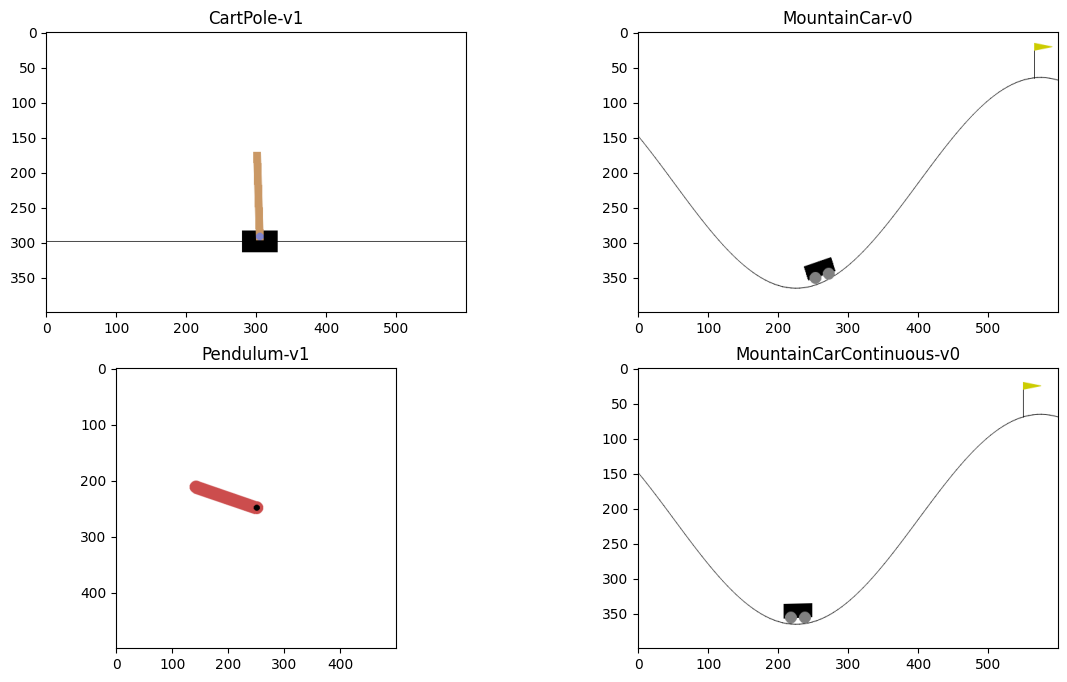

In [13]:
fig = plot_env_list(['CartPole-v1', 'MountainCar-v0', 'Pendulum-v1',  'MountainCarContinuous-v0'  
                        ], nrows=2, figsize=(14,8))

In [14]:
env =  gym.make('CartPole-v1', render_mode="human")
(state, _)=env.reset()

env.render()

In [15]:
%pip install imageio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 2.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
import imageio

# Set up the environment
env = gym.make('CartPole-v1', render_mode='rgb_array')
state, _ = env.reset()

# Simulate the environment
episodeNumber = 5
timeSteps = 100
frames = []  # List to store each frame

for episodeIndex in range(episodeNumber):
    initial_state, _ = env.reset()
    for timeIndex in range(timeSteps):
        frames.append(env.render())
        random_action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(random_action)
        if terminated:
            break

# Save the frames as a GIF
imageio.mimsave('cartpole.gif', frames, fps=30)

env.close()


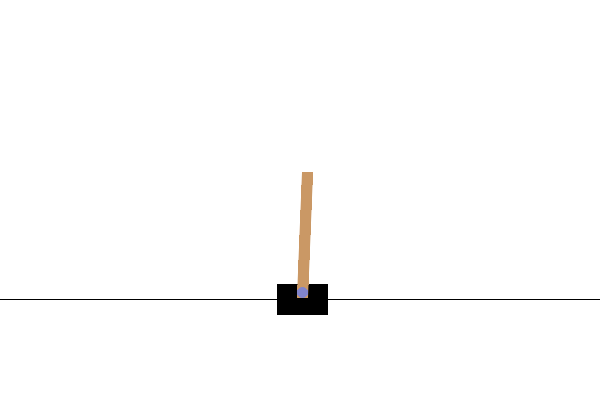

In [17]:
from IPython.display import Image

# Load the GIF
Image(filename="cartpole.gif")
